In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
val_x, val_y = mnist.test.next_batch(5000)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
accuracyList = []
epochList = []

In [5]:

# splitting the data into train, val,test
seed = 128
rng = np.random.RandomState(seed)

def one_hot_encoding(numClasses):
    # producing one hot encoding
    pass

def preproc():
    # converting values to 0-1
    pass
    
def batchForm():
    # form the batch of given batch size
    pass

input_num_units = 784
hidden_num_units = 20
output_num_units = 10

# define placeholders, i.e. way to feed values to computational graph
x = tf.placeholder(tf.float32, [None, input_num_units])
y = tf.placeholder(tf.float32, [None, output_num_units])

# set remaining parameters
epochs = 100
# batch_size = 128
learning_rate = 0.01

weights = {
    'hidden': tf.Variable(tf.random_normal([input_num_units, hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([hidden_num_units, output_num_units], seed=seed))
}

biases = {
    'hidden': tf.Variable(tf.random_normal([hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random_normal([output_num_units], seed=seed))
}

hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

init = tf.initialize_all_variables()

for i in range(1, 55):
    with tf.Session() as sess:
    # create initialized variables
        sess.run(init)        
        for epoch in range(epochs):
            avg_cost = 0
            total_batch = i
            for i in range(total_batch):
                batch_x, batch_y = mnist.train.next_batch(200)
                _, c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
                avg_cost += c / total_batch 

    #         print("Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost))
    #         epochList.append(avg_cost)

        pred_temp = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
        ac = accuracy.eval({x: val_x.reshape(-1, 784), y: val_y})
        print("Testing Accuracy:", ac)
        accuracyList.append(ac)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Testing Accuracy: 0.0846
Testing Accuracy: 0.0898
Testing Accuracy: 0.1204
Testing Accuracy: 0.1764
Testing Accuracy: 0.2436
Testing Accuracy: 0.3136
Testing Accuracy: 0.3436
Testing Accuracy: 0.3812
Testing Accuracy: 0.4248
Testing Accuracy: 0.4048
Testing Accuracy: 0.3748
Testing Accuracy: 0.3912
Testing Accuracy: 0.391
Testing Accuracy: 0.4418
Testing Accuracy: 0.4482
Testing Accuracy: 0.4914
Testing Accuracy: 0.5108
Testing Accuracy: 0.5436
Testing Accuracy: 0.5928
Testing Accuracy: 0.5914
Testing Accuracy: 0.6578
Testing Accuracy: 0.6054
Testing Accuracy: 0.6816
Testing Accuracy: 0.69
Testing Accuracy: 0.7062
Testing Accuracy: 0.7174
Testing Accuracy

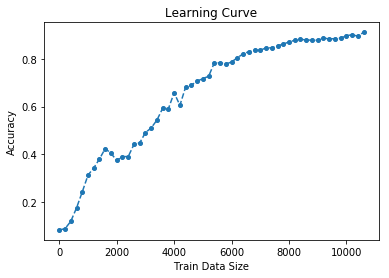

In [8]:
def plot(values):
    name = "_curve.jpg"
    name = str(hidden_num_units)+"_"+str(epochs) + name
    name = "./graphs/" + name
    xVal = np.arange(len(values)) * 200
#     print(xVal)
#     xVal.append(32)
#     print(xVal)
    plt.plot(xVal, values, marker='o',markersize='4', linestyle='--')
    plt.ylabel("Accuracy")
    plt.xlabel("Train Data Size")
    plt.title("Learning Curve")
#     plt.show()
    plt.savefig(name)
    
plot(np.array(accuracyList))